## Reproduces Extended Data Figure 6 in Lauer et al., Nature Methods 2022

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='ticks')
from utils import plot_detection_performance

%matplotlib inline

Fig S6c

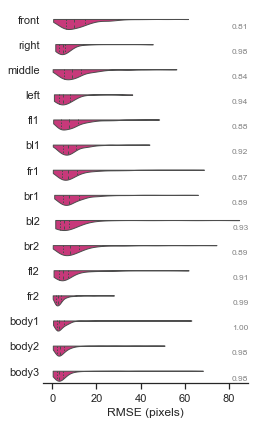

In [2]:
fig, ax = plt.subplots(tight_layout=True, figsize=(3.65, 6))
df1 = plot_detection_performance(
    '../data/figS6/dist_similar.csv',
    '../data/figS6/meta_similar.pickle',
    pcutoff=0.6,
    pck_threshold=17,  # 17: 1/3 the ear-to-ear distance
    cmap='PuRd',
    ax=ax,
)
fig.savefig('figS6c.jpg', dpi=600)

/Users/mwmathis/Documents/maDLC_NatureMethods2022/notebooks/utils.py:129: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(rmse[:, 0] <= rmse[:, 1]) / rmse.shape[0]


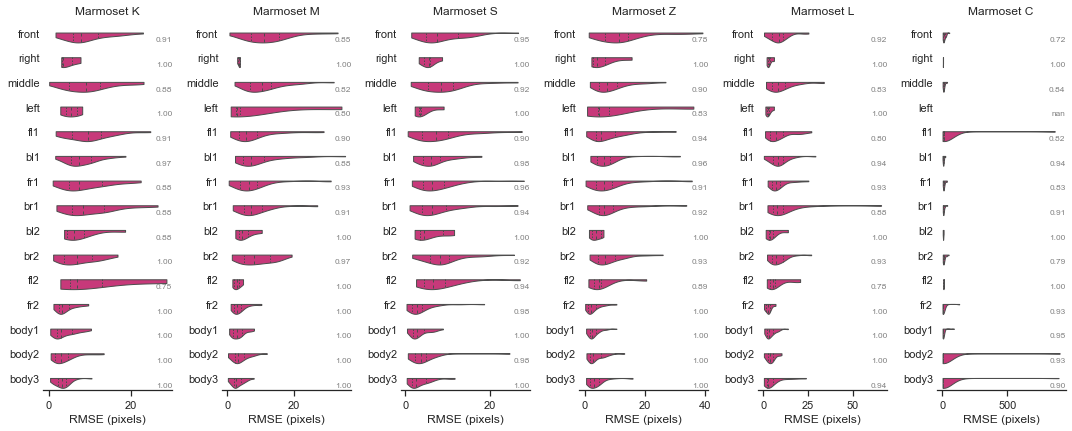

In [3]:
import numpy as np
import pandas as pd

df = pd.read_hdf('../data/figS6/diff_cages.h5')
df = df[df['cond'] == 'similar']
folders = df['folder']
folder_names = [
    'kelle_1', 'munch_1', 'scooby_1', 'zaepela_1', 'lucario_1', 'chips_1',
]
fig, axes = plt.subplots(
    ncols=len(folder_names), tight_layout=True, figsize=(15, 6.1),
)
for i, folder in enumerate(folder_names):
    inds = np.flatnonzero(folders.isin([folder]))
    plot_detection_performance(
        '../data/figS6/dist_similar.csv',
        '../data/figS6/meta_similar.pickle',
        pcutoff=0.6,
        pck_threshold=17,  # 17: 1/3 the ear-to-ear distance
        cmap='PuRd',
        ax=axes[i],
        inds=inds,
    )
    axes[i].set_title(f'Marmoset {folder.upper()[0]}')
fig.savefig('figS6d.jpg', dpi=600)

plt.show()